<a href="https://colab.research.google.com/github/mongmongmingming/DongStudy/blob/main/ex05)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%A8%EC%85%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 10 종류의 패션 이미지 데이터를 분류하는 신경망 모델을 만들어보자 !

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# keras에서 지원하는 딥러닝 학습용 손글씨 이미지 데이터 임포트
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
data = fashion_mnist.load_data()

In [ ]:
len(data)


2

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


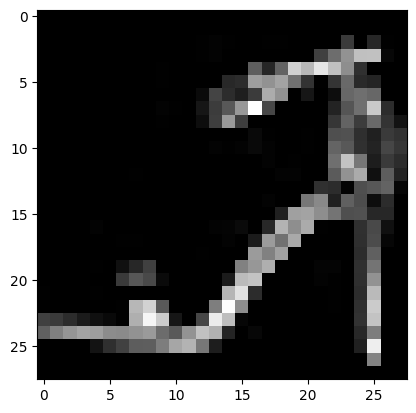

In [ ]:
plt.imshow(X_train[8], cmap = 'gray')

In [ ]:
pd.get_dummies(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


- 정답 데이터 원핫인코딩

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

In [ ]:
X_train.shape, X_test.shape
# 이미지는 픽셀 하나하나가 데이터의 특성으로 인지됨
# 현재 2차원으로 1차원 변경 필요(reshape 사용은 ex04에 있음.)

((60000, 28, 28), (10000, 28, 28))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Flatten : 신경망에 데이터를 넣을 때 자동으로 1차원으로 펴주는 함수

# 신경망 구조 설계
model = Sequential()

model.add(Flatten(input_shape = (28, 28)))

# 중간층
model.add(Dense(500, activation = 'sigmoid')) # 하나의 층
model.add(Dense(300, activation = 'sigmoid')) # 하나의 층
model.add(Dense(100, activation = 'sigmoid')) # 하나의 층

# 출력층
# 출력층은 문제의 종류에 따라서 고정됨(2진분류 문제는 출력층 뉴런 개수 1개, 활성화 함수는 sigmoid로 고정)
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습 및 평가방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수
# -> 오차의 평균을 구하는 것은 mse와 같지만 0~1사이값(분류를 편하게 하기 위해)으로 변환 후 평균오차를 구해냄
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam', # 최적화함수 : 확률적 경사하강법(SGD) 활용, 최적화 알고리즘(Adam) 활용
              metrics = ['acc'] # metrics : 평가방법을 설정(분류 문제이므로 정확도 출력 필요)
              )

In [ ]:
h = model.fit(X_train, y_train_one_hot,
              epochs = 30,
              batch_size = 128, # 한번에 학습되는 데이터의 개수(디폴트 32개)
              verbose = 1 # 학습 결과의 출력 형태 결정(0 : 출력 X, 1 : bar형태(디폴트), 2 : bar없이 출력)
              )

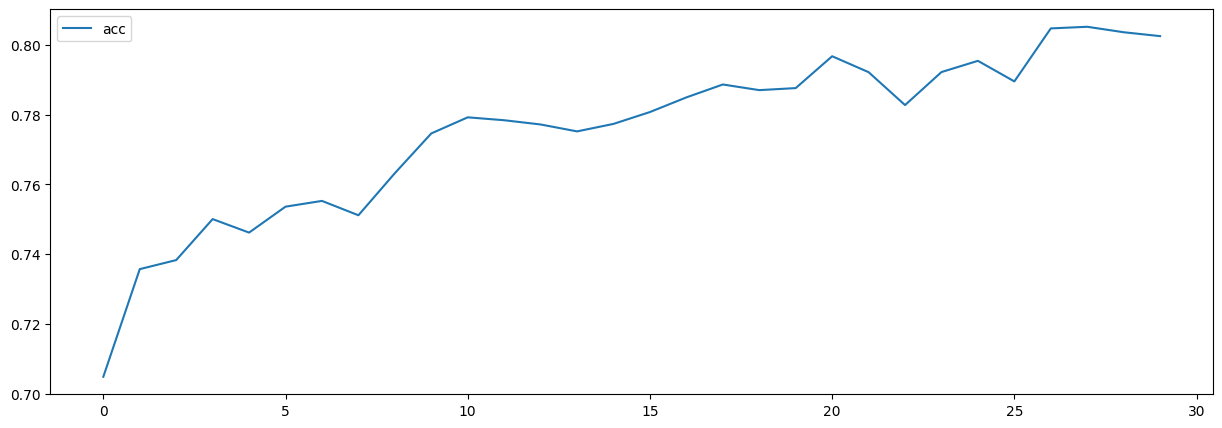

In [ ]:
# 시각화
plt.figure(figsize = (15, 5))

plt.plot(h.history['acc'], label = 'acc')

plt.legend()
plt.show()

In [ ]:
# 모델 평가
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 0.5492 - acc: 0.7989


[0.549201488494873, 0.7989000082015991]

### Validation

In [ ]:
# 무조건 train, test만 나눠주는게 아니라 데이터를 일정 비율로 랜덤하게 나눠주는 기능을 갖고있음.
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train_one_hot, y_validation_one_hot = train_test_split(X_train, y_train_one_hot,
                                                                                random_state = 33
                                                                                )

print(X_train.shape)
print(X_validation.shape)
print(y_train_one_hot.shape)
print(y_validation_one_hot.shape)

(45000, 28, 28)
(15000, 28, 28)
(45000, 10)
(15000, 10)


In [ ]:
# 신경망 구조 설계
model1 = Sequential()

model1.add(Flatten(input_shape = (28, 28)))

# 중간층
model1.add(Dense(500, activation = 'sigmoid')) # 하나의 층
model1.add(Dense(300, activation = 'sigmoid')) # 하나의 층
model1.add(Dense(100, activation = 'sigmoid')) # 하나의 층

# 출력층
# 출력층은 문제의 종류에 따라서 고정됨(2진분류 문제는 출력층 뉴런 개수 1개, 활성화 함수는 sigmoid로 고정)
model1.add(Dense(10, activation = 'softmax'))

model1.summary()

model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam', # 최적화함수 : 확률적 경사하강법(SGD) 활용, 최적화 알고리즘(Adam) 활용
              metrics = ['acc'] # metrics : 평가방법을 설정(분류 문제이므로 정확도 출력 필요)
              )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 300)               150300    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h1 = model1.fit(X_train, y_train_one_hot,
                batch_size = 128,
                epochs = 30,
                validation_data = (X_validation, y_validation_one_hot) # 검증용 데이터셋 추가
                )

Epoch 1/30
352/352 [==============================] - 4s 6ms/step - loss: 0.8856 - acc: 0.6989 - val_loss: 0.7053 - val_acc: 0.7125
Epoch 2/30
352/352 [==============================] - 3s 8ms/step - loss: 0.6990 - acc: 0.7338 - val_loss: 0.7101 - val_acc: 0.7329
Epoch 3/30
352/352 [==============================] - 2s 5ms/step - loss: 0.6817 - acc: 0.7352 - val_loss: 0.7022 - val_acc: 0.7112
Epoch 4/30
352/352 [==============================] - 2s 5ms/step - loss: 0.6563 - acc: 0.7425 - val_loss: 0.6859 - val_acc: 0.7320
Epoch 5/30
352/352 [==============================] - 2s 5ms/step - loss: 0.6502 - acc: 0.7450 - val_loss: 0.6400 - val_acc: 0.7464
Epoch 6/30
352/352 [==============================] - 2s 6ms/step - loss: 0.6312 - acc: 0.7553 - val_loss: 0.6542 - val_acc: 0.7579
Epoch 7/30
352/352 [==============================] - 3s 9ms/step - loss: 0.6375 - acc: 0.7535 - val_loss: 0.6597 - val_acc: 0.7526
Epoch 8/30
352/352 [==============================] - 4s 11ms/step - loss: 0

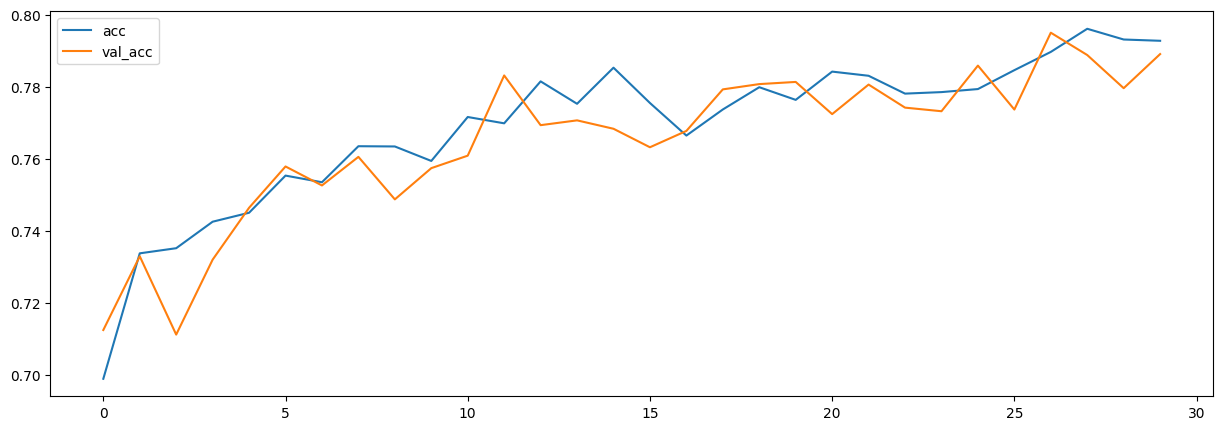

In [ ]:
# 시각화
plt.figure(figsize = (15, 5))
# train 데이터
plt.plot(h1.history['acc'], label = 'acc')
# validation 데이터
plt.plot(h1.history['val_acc'], label = 'val_acc')

plt.legend()
plt.show()

In [ ]:
model1.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.5676 - acc: 0.7838


[0.5675699710845947, 0.7838000059127808]

### 앞선 손글씨 이미지 데이터와 동일한 형태의 데이터를 동일한 구조로 학습시켰지만 정확도가 차이나는 이유는 패션 이미지 데이터의 복잡도가 더 높았기 때문이다 !